# Introduction to Network Analysis with Python



<div class="frontmatter text-center">
<img src="network.png" width="800px"/>
</div>

NetworkX and IGraph are the most common tools in Python for Network Analysis. We will use [NetworkX](https://networkx.github.io/) in this class, because it has a much better Documentation.  



<div class="frontmatter text-center">
<img src="networkx.png" width="800px"/>
</div>

### More resources:
- [PyCon Talk about Network Analysis](http://prezi.com/szsbgd2ortmu/?utm_campaign=share&utm_medium=copy&rc=ex0share)
- [Filtering methods](https://github.com/velf/Network_Analytical_Notebooks/blob/master/Network_Projection_Filtering.ipynb)
- [Interactive Network Visualization in Bokeh](https://github.com/blue-yonder/documents/tree/master/presentations/EuroPython%202016/networkx_visualization_powered_by_bokeh)

In [35]:
import networkx as nx
import matplotlib.pylab as plt
import numpy as np
import seaborn
import pandas as pd
%matplotlib inline

## Creating a graph from scratch

In [2]:
G=nx.Graph()
G.add_node(1)

In [3]:
G.nodes()

[1]

In [4]:
for i in range(0,10):
    G.add_node(i)

In [5]:
G.nodes()

[1, 0, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
G.add_edge(1,2)

In [7]:
for i in range(0,8):
    G.add_edge(i, i+2)

In [8]:
G.edges()

[(1, 2), (1, 3), (0, 2), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9)]

/Users/orsolyavasarhelyi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/orsolyavasarhelyi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/orsolyavasarhelyi/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/orsolyavasarhelyi/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be

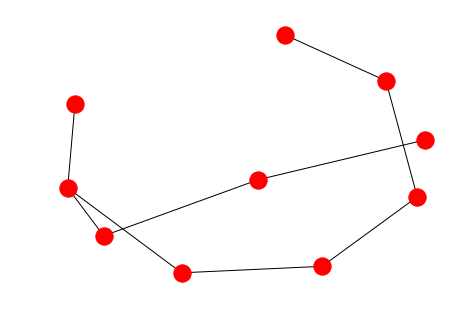

In [9]:
nx.draw(G)

In [10]:
G.number_of_edges()

9

In [11]:
G.number_of_nodes()

10

In [12]:
nx.density(G)

0.2

In [13]:
nx.degree(G)

{0: 1, 1: 2, 2: 3, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 1, 9: 1}

Let's use a bit more complicated data. We will use the Marvel superheroes network to investigate the capabilites of Networkx. 

Our to do:
1. *Read and Parse the source files as bipartite network (marvel_heroes.nodes, marvel_issues.nodes) - done by me*
2. Project it into superhero-superhero network
3. Descriptive Statistics (density, degree ditribution)
4. Filtering
5. Community detection
6. Visualization

### The planned result is similar to this:

<div class="frontmatter text-center">
<img src="network_of_marvel.jpg" width="600px"/>
</div>


### 1. Read the files

In [14]:
g=nx.Graph()
heroes_ids= set()
for line in open ('marvel_heroes.nodes'):
    id, name = line.strip().split(' ', 1)
    g.add_node(int(id), {'name': name.replace('"', ''), 'bpartite': 0})
    heroes_ids.add(int(id))

In [15]:
issues_ids= set()
issue_name_to_id={}
for line in open ('marvel_issues.nodes'):
    id, name = line.strip().split(' ', 1)
    g.add_node(int(id), {'name': name.replace('"', ''), 'bpartite': 1})
    issues_ids.add(int(id))
    issue_name_to_id[name.replace('"', '')]=int(id)

In [18]:
for line in open ('marvel.edges'):
    ids = list(map(int, line.strip().split()))
    from_id = ids[0]
    for to_id in ids[1:]:
        g.add_edge(from_id, to_id)    

In [20]:
print (g.number_of_nodes())
print (g.number_of_edges())

19428
96662


### 2. Bipartite Projection

In [21]:
nx.is_bipartite(g)

True

In [22]:
h = nx.bipartite.projected_graph(g, heroes_ids)

In [24]:
print (h.number_of_nodes())
print (h.number_of_edges())

6486
168267


In [27]:
d = nx.degree(h)

### 3. Statistics

### EXERCISE
1. Create a degree distribution plot, where xscale is logarithmic (try with log-log as well)
2. Finish these two statements:
        print 'Average Degree '+
        print 'Highest Degree '+
3. Find ut which superhero has the highest degree
4. Repeat these tasks (1-3) with Betweeness Centrality as well
5. Calculate and plot the Clustering Coefficient Histogram on log plot, interpet the results with finishing these satements:
        print 'Average clustering: 
        print 'Number of nodes in fully connected neighborhood: '
        print 'Number of bridges: '
        print 'Network density: '


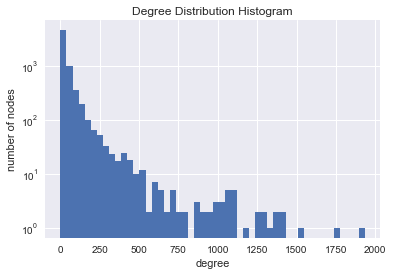

In [31]:
d = nx.degree(h)
plt.hist(list(d.values()),bins=50)
plt.title("Degree Distribution Histogram")
plt.ylabel("number of nodes")
plt.xlabel("degree")
plt.yscale('log', nonposy='clip')
#plt.xscale('log', nonposy='clip')
plt.show()

In [33]:
from collections import Counter

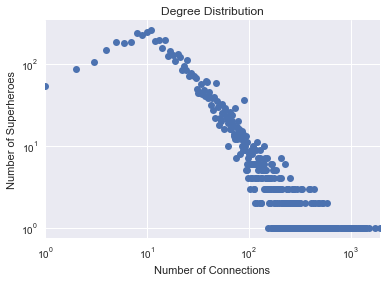

In [48]:
pd.DataFrame.from_dict(Counter(list(d.values())), 'index').sort_index().plot(loglog=True, title='Degree Distribution', style="o")
plt.legend("")
plt.xlabel("Number of Connections")
plt.ylabel("Number of Superheroes")

In [29]:
#plt.plot(list(d.values()),bins=50)

In [52]:
print ('Average Degree: '+str(sum(h.degree().values())/g.number_of_nodes()))
print ('Highest Degree: '+str(max(h.degree().values())))
node_degree=[]
for m,i in d.items():
    node_degree.append((i,m))
print ("Superhero with highest degree: "+str(h.node[sorted(node_degree)[-1][1]]['name']))

Average Degree: 17.322112415071032
Highest Degree: 1933
Superhero with highest degree: CAPTAIN AMERICA


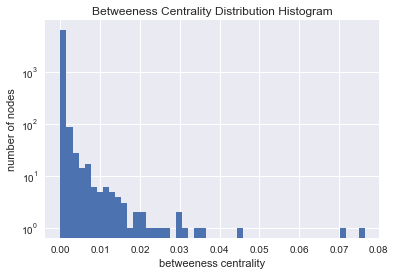

In [54]:
bc=nx.betweenness_centrality(h,k=100)
plt.title("Betweeness Centrality Distribution Histogram")
plt.ylabel("number of nodes")
plt.xlabel("betweeness centrality")
plt.hist(list(bc.values()),bins=50)
plt.yscale('log', nonposy='clip')
plt.show()

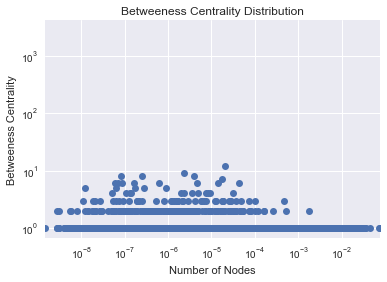

In [59]:
pd.DataFrame.from_dict(Counter(list(bc.values())), 'index').sort_index().plot(loglog=True,title='Betweeness Centrality Distribution', style="o")
plt.legend("")
plt.xlabel("Number of Nodes")
plt.ylabel("Betweeness Centrality")

In [62]:
print ('Average Betweeness: '+str(np.mean(list((bc.values())))))
print ('Highest Betweeness: '+str(max(list(bc.values()))))

node_bc=[]
for m,i in bc.items():
    node_bc.append((i,m))
print ("Superhero with highest betweeness: "+str(g.node[sorted(node_bc)[-1][1]]['name']))
#print sorted(node_bc)[-1][0]


Average Betweeness: 0.000250425815375
Highest Betweeness: 0.0764378222871284
Superhero with highest betweeness: SPIDER-MAN/PETER PAR


In [63]:
cl=nx.clustering(h)

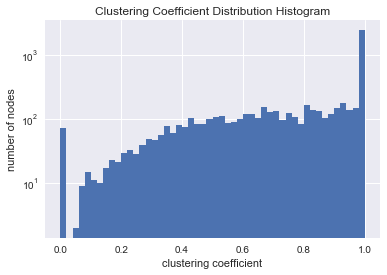

In [64]:
plt.hist(list(cl.values()),bins=50)
plt.title("Clustering Coefficient Distribution Histogram")
plt.ylabel("number of nodes")
plt.xlabel("clustering coefficient")
plt.yscale('log', nonposy='clip')
plt.show()

In [66]:
print ('Average clustering: '+str(np.mean(list(cl.values()))))
print ('Number of nodes in fully connected neighborhood: '+str(list(cl.values()).count(1)))
print ('Number of bridges: '+str(list(cl.values()).count(0)))

Average clustering: 0.773832653546
Number of nodes in fully connected neighborhood: 2346
Number of bridges: 72


In [67]:
nx.density(h)

0.008000958591555122

### 4. FILTERING

If we want to filter somehow the network, we should use the weights of the edges. 

In [68]:
g.nodes(data=True)[0]

(1, {'bpartite': 0, 'name': '24-HOUR MAN/EMMANUEL'})

In [69]:
g.edges(data=True)[0]

(1, 6487, {})

But our basic projection did not produced any weights, we just simply connected each superhero who appeared in the same comic issue. We can do it better, and calculate how many times they "worked" together, in that case we will have weights. Based on these weights we can filter our data to keep only the strong relations. Networkx has a few built-in weighted projections:

### weighted_projected_graph(B, nodes, ratio=False)

    Returns a weighted projection of B onto one of its node sets.

    The weighted projected graph is the projection of the bipartite network B onto the specified nodes with weights representing the number of shared neighbors or the ratio between actual shared neighbors and possible shared 
    neighbors if ratio=True . The nodes retain their attributes and are connected in the resulting graph if they 
    have an edge to a common node in the original graph.
    
    
### collaboration_weighted_projected_graph(B, nodes)

    Newman’s weighted projection of B onto one of its node sets.

    The collaboration weighted projection is the projection of the bipartite network B onto the specified nodes with weights assigned using Newman’s collaboration model [1]:

$$w_{v,u} = \sum_k \frac{\delta_{v}^{w} \delta_{w}^{k}}{k_w - 1}$$

Where v and u are nodes from the same bipartite node set, and w is a node of the opposite node set. $k_w$ is the degree of node w in the bipartite network and $\delta_{v}^{w}$ is 1 if node v is linked to node w in the original bipartite graph or 0 otherwise.

    The nodes retain their attributes and are connected in the resulting graph if have an edge to a common node in the original bipartite graph.
[1] Scientific collaboration networks: II. Shortest paths, weighted networks, and centrality, M. E. J. Newman, Phys. Rev. E 64, 016132 (2001).

In [70]:
H = nx.bipartite.collaboration_weighted_projected_graph(g, heroes_ids)

In [71]:
H.edges(data=True)[:10]

[(1, 6464, {'weight': 0.2}),
 (1, 6471, {'weight': 0.2}),
 (1, 1999, {'weight': 0.2}),
 (1, 6459, {'weight': 0.2}),
 (1, 6463, {'weight': 0.2}),
 (2, 6148, {'weight': 0.2090909090909091}),
 (2, 522, {'weight': 0.00909090909090909}),
 (2, 3594, {'weight': 0.00909090909090909}),
 (2, 533, {'weight': 0.00909090909090909}),
 (2, 2069, {'weight': 0.00909090909090909})]

In [72]:
H.nodes(data=True)[0]

(1, {'bpartite': 0, 'name': '24-HOUR MAN/EMMANUEL'})

Let's create a weight distribution plot to see, how it loks like!

In [74]:
weights=[]
for (_,_, weight) in H.edges(data=True):
    weights.append(list(weight.values())[0])  

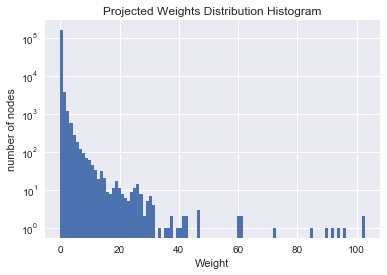

In [75]:
plt.hist(weights,bins=100)
plt.title("Projected Weights Distribution Histogram")
plt.ylabel("number of nodes")
plt.xlabel("Weight")
#plt.xscale('log', nonposy='clip')
plt.yscale('log', nonposy='clip')

plt.show()

In [76]:
H.number_of_edges()

168267

In [77]:
H.number_of_nodes()

6486

In [78]:
nx.density(H)

0.008000958591555122

In [79]:
min(weights), max(weights), np.mean(weights)

(0.00909090909090909, 102.71847637215754, 0.28262523251736821)

In [81]:
H.nodes(data=True)[1]

(2, {'bpartite': 0, 'name': '3-D MAN/CHARLES CHAN'})

In [83]:
f=nx.Graph()
for (j,k, w) in H.edges(data=True):
    if list(w.values())[0]>=5:
        f.add_edge(j,k,attr_dict=w)

In [84]:
f.number_of_edges(), f.number_of_nodes(), nx.density(f)

(872, 354, 0.013956242697780126)

In [87]:
from collections import defaultdict

In [88]:
heronames=defaultdict(str)
for (i,d) in H.nodes(data=True):
    if i in list(f.nodes()):
        heronames[i]=d['name']

In [89]:
nx.set_node_attributes(f, 'hero', heronames)

In [90]:
f.nodes(data=True)[0]

(10, {'hero': 'ABOMINATION/EMIL BLO'})

### 5. Clustering

The community package is an extension of NetworkX, implementing the Louvain Modularity clustering, which is one of the most used algorithm in community detection (and best). More info: https://en.wikipedia.org/wiki/Louvain_Modularity

**Modularity**: defined as a value between -1 and 1 that measures the density of links inside communities compared to links between communities


In [91]:
import community
from collections import Counter, defaultdict

In [92]:
part = community.best_partition(f) #calculate best parttion for each node
values = [part.get(node) for node in f.nodes()] #get the values for each node
counterx=Counter(values)

### 6. Visualization

NetworkX provides basic functionality for visualizing graphs, but its main goal is to enable graph analysis rather than perform graph visualization. In the future, graph visualization functionality may be removed from NetworkX or only available as an add-on package.

Proper graph visualization is hard, and we highly recommend that people visualize their graphs with tools dedicated to that task. Notable examples of dedicated and fully-featured graph visualization tools are [Cytoscape](http://www.cytoscape.org/), [Gephi](https://gephi.org/). To use these and other such tools, you should export your NetworkX graph into a format that can be read by those tools. For example, Cytoscape can read the GraphML format or edgelists (csv), and so, networkx.write_graphml(G) might be an appropriate choice.

/Users/orsolyavasarhelyi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/orsolyavasarhelyi/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/orsolyavasarhelyi/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/orsolyavasarhelyi/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be

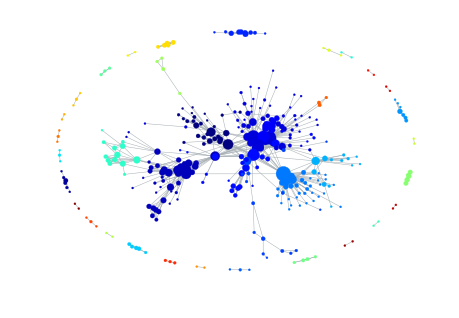

Number of communities by the Louven method: 38
Modularity: 0.7822209338467474


In [94]:
pos=nx.fruchterman_reingold_layout(f, scale=6.0)  #Fruchterman-Reingold force-directed algorithm
#See more: https://en.wikipedia.org/wiki/Force-directed_graph_drawing
nx.draw(f, pos=pos, 
        cmap = plt.get_cmap('jet'), 
        node_color = values, 
        edge_color='#A6AFB4', 
        width=0.5 ,
        node_size=[i*4 for i in f.degree().values()], #Node size based on the number of connections
        with_labels=False)
plt.show()
print ('Number of communities by the Louven method: '+str(len(counterx.keys())))
print ('Modularity: '+str(community.modularity(part, f)))


### 6.B  Interactive visualization to see who these guys are 

In [95]:
#! conda install bokeh

### [Bokeh](http://bokeh.pydata.org/en/latest/)


<div class="frontmatter text-center">
<img src="bokeh.png" width="1000px"/>
</div>

In [206]:
from ipywidgets import interact
from bokeh.io import push_notebook
from bokeh.plotting import figure, output_notebook, show

In [215]:
from bokeh.models import ColumnDataSource

nodes, nodes_coordinates = zip(*sorted(pos.items()))
nodes_xs, nodes_ys = list(zip(*nodes_coordinates))
heroes=[]
for i in range(0,len(nodes)):
    heroes.append(list(f.node[nodes[i]].values())[0])
nodes_source =ColumnDataSource(dict(x=nodes_xs, y=nodes_ys,
                                     hero=heroes))

In [216]:
#heroes

In [225]:
from bokeh.plotting import show, figure
from bokeh.io import output_notebook
from bokeh.models import HoverTool

hover = HoverTool(tooltips=[('hero', '@hero')])
plot = figure(plot_width=800, plot_height=400,
              tools=['tap', hover, 'box_zoom', 'reset'])

plot.axis.visible = False
plot.grid.visible = False

r_circles = plot.circle('x', 'y', source=nodes_source, size=10,
                        color='blue', level = 'overlay')

In [226]:
output_notebook()

Loading BokehJS ...

In [227]:
show(plot)

In [228]:
def get_edges_specs(_network, _layout):
    d = dict(xs=[], ys=[], alphas=[])
    weights = [d['weight'] for u, v, d in _network.edges(data=True)]
    max_weight = max(weights)
    calc_alpha = lambda h: 0.1 + 0.6 * (h / max_weight)

    # example: { ..., ('user47', 'da_bjoerni', {'weight': 3}), ... }
    for u, v, data in _network.edges(data=True):
        d['xs'].append([_layout[u][0], _layout[v][0]])
        d['ys'].append([_layout[u][1], _layout[v][1]])
        d['alphas'].append(calc_alpha(data['weight']))
    return d

In [229]:
lines_source=ColumnDataSource(data=get_edges_specs(f, pos))

In [230]:
r_lines = plot.multi_line('xs', 'ys', source=lines_source, line_width=1.5, alpha='alphas',
                          color='navy')

In [231]:
from bokeh.models import GlyphRenderer, Circle
grs = r_circles.select(dict(type=GlyphRenderer))
for glyph in grs:
    if isinstance(glyph.glyph, Circle):
        circle_renderer = glyph
hover.renderers = [circle_renderer]

In [232]:
show(plot)

In [233]:
centrality =\
    nx.degree(f)
# first element are nodes again
_, nodes_centrality = zip(*sorted(centrality.items()))
max_centraliy = max(nodes_centrality)
nodes_source.add([7 + 20 * t / max_centraliy
                  for t in nodes_centrality],
                 'centrality')

'centrality'

In [234]:
partition = community.best_partition(f)
p_, nodes_community = zip(*sorted(partition.items()))
nodes_source.add(nodes_community, 'community')
community_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628', '#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
nodes_source.add([community_colors[t % len(community_colors)]
                  for t in nodes_community],
                 'community_color')

'community_color'

In [235]:
r_circles.glyph.size = 'centrality'
r_circles.glyph.fill_color = 'community_color'

In [236]:
show(plot)